## **Importing Drive**


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
pip install wordcloud matplotlib


## **Installing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Work With Data**

In [4]:
data1 = pd.read_csv('/content/drive/MyDrive/Google Colab/disease-symptom-prediction/data/dataset.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Google Colab/disease-symptom-prediction/data/Symptom-severity.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Google Colab/disease-symptom-prediction/data/symptom_Description.csv')
data4 = pd.read_csv('/content/drive/MyDrive/Google Colab/disease-symptom-prediction/data/symptom_precaution.csv')

## **Data1 Visualizations**

In [5]:
sns.set(style='whitegrid')
data1.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Changing format of data
symptom_cols = [col for col in data1.columns if col.startswith('Symptom')]

data_long = data1.melt(
    id_vars='Disease',
    value_vars=symptom_cols,
    var_name='Symptom_Order',
    value_name='Symptom'
)

data_long.dropna(subset=['Symptom'], inplace=True)
print(data_long.shape)
print(data_long.head(10))


(36648, 3)
            Disease Symptom_Order     Symptom
0  Fungal infection     Symptom_1     itching
1  Fungal infection     Symptom_1   skin_rash
2  Fungal infection     Symptom_1     itching
3  Fungal infection     Symptom_1     itching
4  Fungal infection     Symptom_1     itching
5  Fungal infection     Symptom_1   skin_rash
6  Fungal infection     Symptom_1     itching
7  Fungal infection     Symptom_1     itching
8  Fungal infection     Symptom_1     itching
9  Fungal infection     Symptom_1     itching


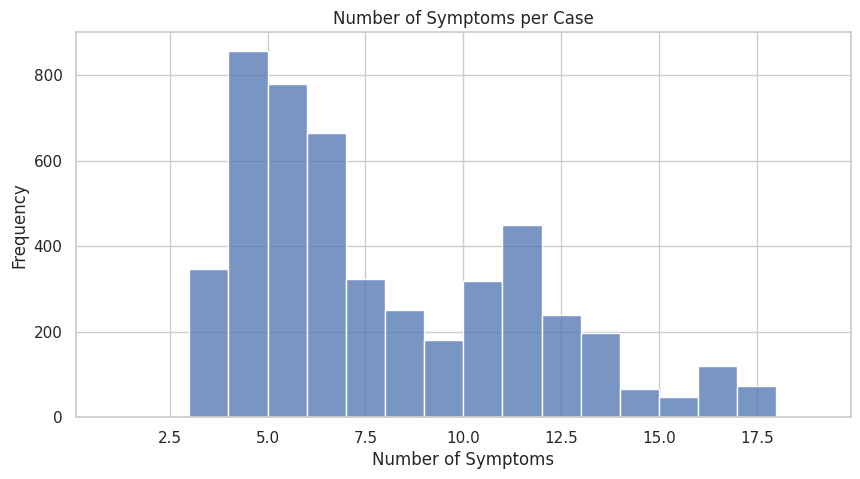

In [22]:
# GOAL : visualize how many symptoms each patient case has.
symptom_count = data1.drop('Disease', axis=1).notna().sum(axis=1)

plt.figure(figsize=(10,5))
sns.histplot(
    symptom_count,
    bins=range(1, 20),
    kde=False # just showing bars
)
plt.title("Number of Symptoms per Case")
plt.xlabel("Number of Symptoms")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-23-2477682937.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette="viridis")


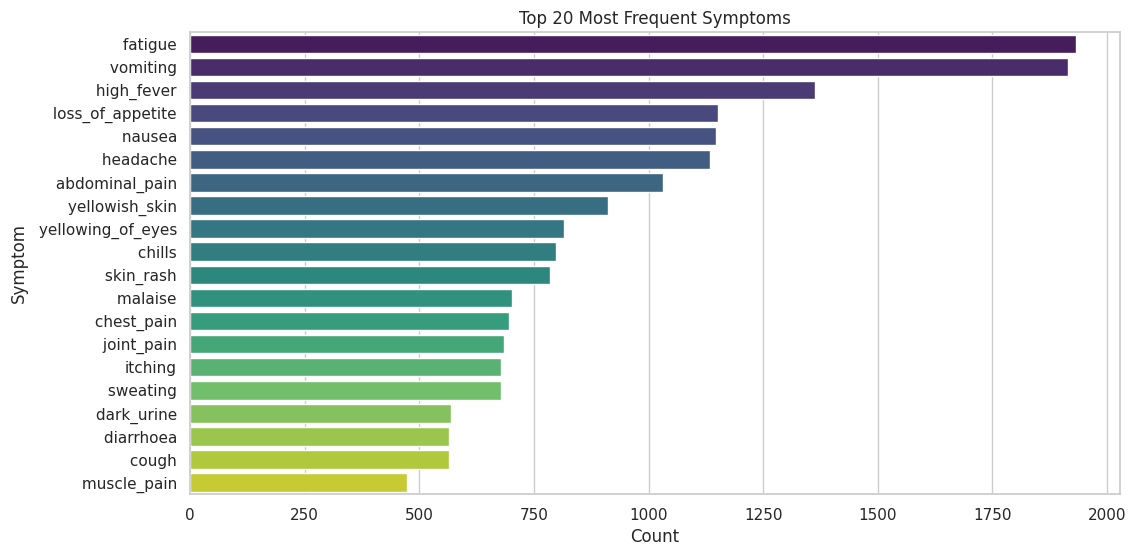

In [23]:
# GOAL: visualize top 20 symptoms across all disease case
all_symptoms = data1.drop('Disease', axis=1).values.flatten() # Flatten all symptom columns into one list
symptom_series = pd.Series(all_symptoms)
symptom_counts = symptom_series.value_counts().dropna().head(20)


plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette="viridis")
plt.title("Top 20 Most Frequent Symptoms")
plt.xlabel("Count")
plt.ylabel("Symptom")
plt.show()


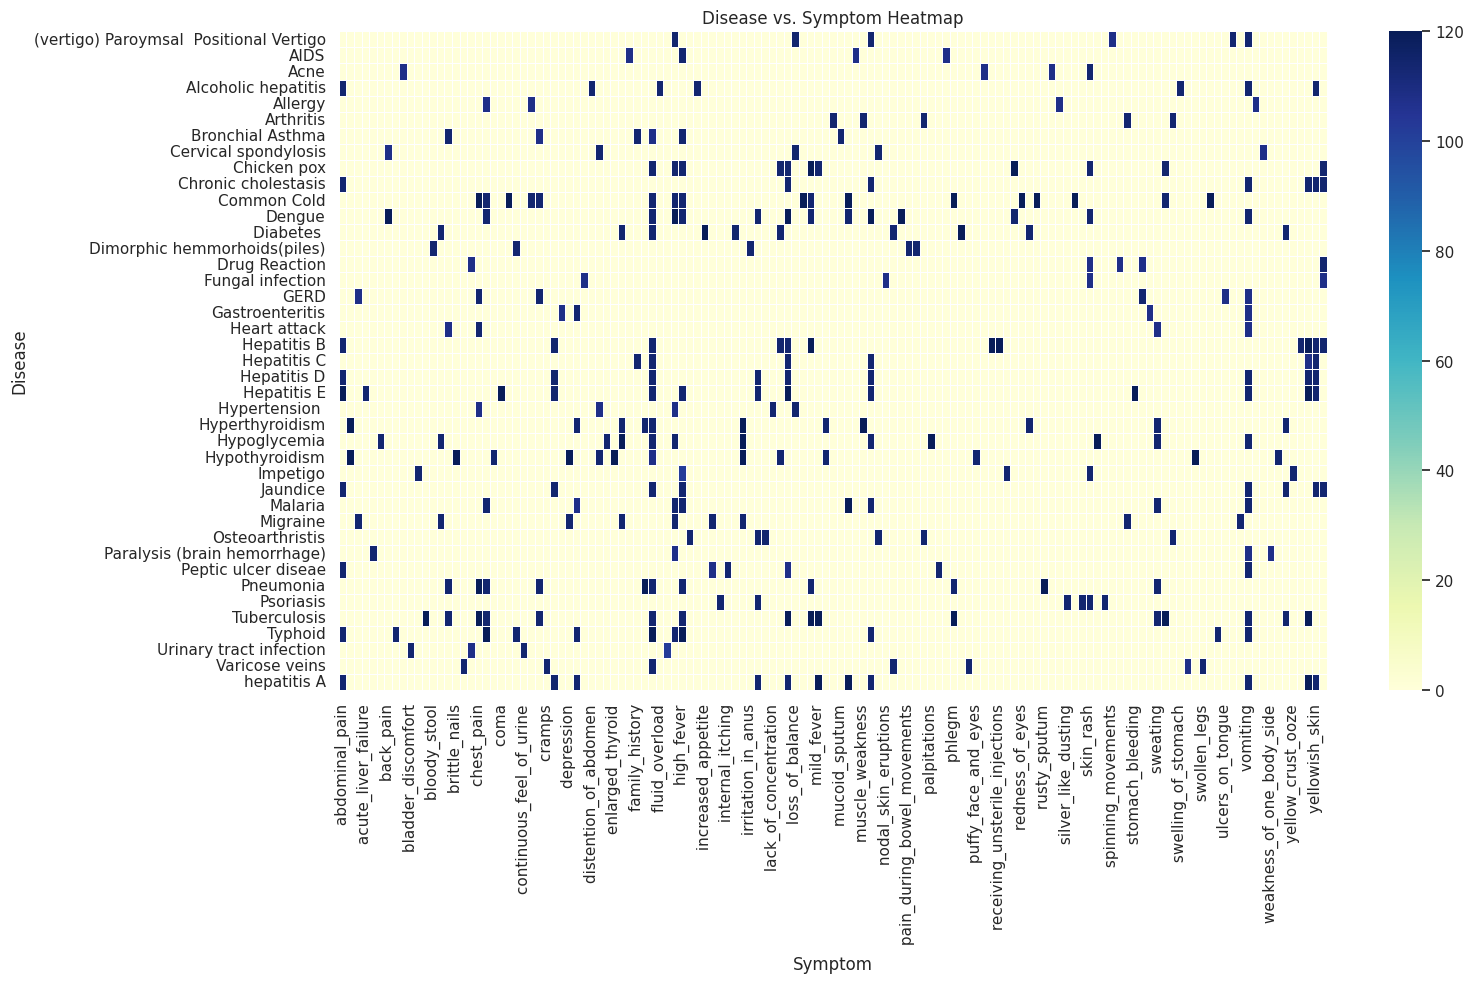

In [24]:
# GOAL : how many times each symptom appears for each disease
pivot_table = pd.crosstab(data_long['Disease'], data_long['Symptom'])

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title("Disease vs. Symptom Heatmap")
plt.xlabel("Symptom")
plt.ylabel("Disease")
plt.tight_layout()
plt.show()


## **Data2 Visualizations**

In [25]:
data2.head(10)

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
5,chills,3
6,joint_pain,3
7,stomach_pain,5
8,acidity,3
9,ulcers_on_tongue,4


/tmp/ipython-input-26-2751402179.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_symptoms, x="weight", y='Symptom', palette='viridis')


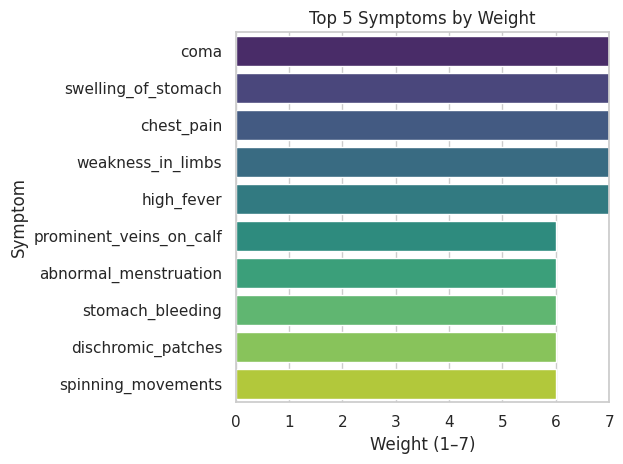

In [26]:
# ascending = False, marks values from highest to lowest
top_symptoms = data2.sort_values(by="weight", ascending=False).head(10)
sns.barplot(data=top_symptoms, x="weight", y='Symptom', palette='viridis')

plt.title("Top 5 Symptoms by Weight")
plt.xlabel("Weight (1–7)")
plt.ylabel("Symptom")
plt.xlim(0, 7)
plt.tight_layout()
plt.show()

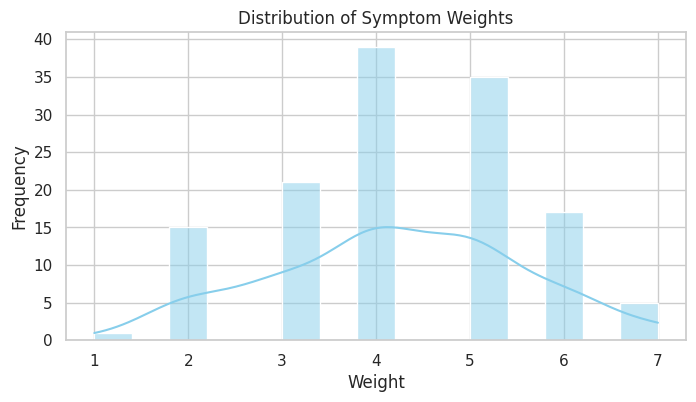

In [30]:
# GOAL : Frequence between weight and symptom
plt.figure(figsize=(8, 4))
sns.histplot(data2['weight'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Symptom Weights")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()


# **Data3**

In [27]:
data3.head(5)

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


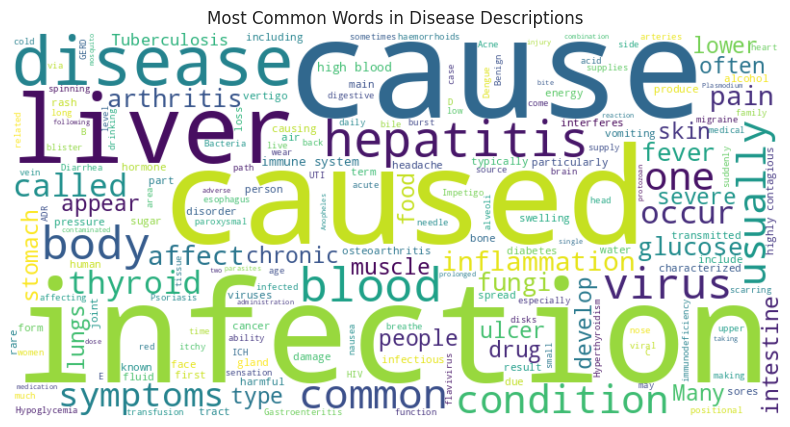

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions into one large string
text = ' '.join(data3['Description'].dropna())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Disease Descriptions")
plt.show()



# **Data4**

In [28]:
data4.head(5)

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
